# Model 3: Random Search Cross Validation (One-Hot Encoding)
In this notebook, we will be using the refined data from Model 1 and our insights gained from our regression function to fine-tune our hyperparameters.

In [1]:
# Import sys so we can import custom packages without error
import sys
sys.path.append('../')

In [2]:
# Import pandas/numpy
import pandas as pd
import numpy as np

# Import our modeling.py module
from src.modules.modeling import *

# Import warnings
import warnings


In [3]:
# Set ignore for warnings
warnings.filterwarnings('ignore')

In [4]:
# Import our saved X and y data exported from Model 1
X_train_M4 = pd.read_csv('../data/X_train_M4.csv', index_col=0)
X_test_M4 = pd.read_csv('../data/X_test_M4.csv', index_col=0)
y_train_M4 = pd.read_csv('../data/y_train_M4.csv', index_col=0)
y_test_M4 = pd.read_csv('../data/y_test_M4.csv', index_col=0)

In [5]:
X_train_M4.columns

Index(['crs_dep_time', 'crs_arr_time', 'crs_elapsed_time', 'flights',
       'distance', 'year', 'month', 'day', 'dep_time_of_day',
       'arr_time_of_day', 'mean_arr_delay_orig_airport',
       'mean_arr_delay_dest_airport', 'mean_arr_delay_carrier',
       'orig_weather_categ_no weather data', 'orig_weather_categ_rain',
       'orig_weather_categ_snow', 'orig_weather_categ_snow & rain',
       'orig_weather_categ_sunny', 'dest_weather_categ_no weather data',
       'dest_weather_categ_rain', 'dest_weather_categ_snow',
       'dest_weather_categ_snow & rain', 'dest_weather_categ_sunny',
       'orig_region_East-South Central', 'orig_region_Mid-Atlantic',
       'orig_region_New England', 'orig_region_North-West',
       'orig_region_Offshore Territory', 'orig_region_Pacific',
       'orig_region_South-Atlantic', 'orig_region_South-West',
       'orig_region_West-North Central', 'orig_region_West-South Central',
       'dest_region_East-South Central', 'dest_region_Mid-Atlantic',
    

In [6]:
X_test_M4.columns

Index(['crs_dep_time', 'crs_arr_time', 'crs_elapsed_time', 'flights',
       'distance', 'year', 'month', 'day', 'dep_time_of_day',
       'arr_time_of_day', 'mean_arr_delay_orig_airport',
       'mean_arr_delay_dest_airport', 'mean_arr_delay_carrier',
       'orig_weather_categ_no weather data', 'orig_weather_categ_rain',
       'orig_weather_categ_snow', 'orig_weather_categ_snow & rain',
       'orig_weather_categ_sunny', 'dest_weather_categ_no weather data',
       'dest_weather_categ_rain', 'dest_weather_categ_snow',
       'dest_weather_categ_snow & rain', 'dest_weather_categ_sunny',
       'orig_region_East-South Central', 'orig_region_Mid-Atlantic',
       'orig_region_New England', 'orig_region_North-West',
       'orig_region_Offshore Territory', 'orig_region_Pacific',
       'orig_region_South-Atlantic', 'orig_region_South-West',
       'orig_region_West-North Central', 'orig_region_West-South Central',
       'dest_region_East-South Central', 'dest_region_Mid-Atlantic',
    

Before running our Random Search, we are going to define some models and parameter ranges for the function


In [7]:
X = pd.concat([X_train_M4, X_test_M4], axis=0)

In [8]:
X.head()

,crs_dep_time,crs_arr_time,crs_elapsed_time,flights,distance,year,month,day,dep_time_of_day,arr_time_of_day,...,dest_region_East-South Central,dest_region_Mid-Atlantic,dest_region_New England,dest_region_North-West,dest_region_Offshore Territory,dest_region_Pacific,dest_region_South-Atlantic,dest_region_South-West,dest_region_West-North Central,dest_region_West-South Central
0,801,850,109.0,1.0,533.0,2018,12,16,0,0,...,0,0,0,0,0,0,0,1,0,0
1,610,847,97.0,1.0,350.0,2019,7,9,0,0,...,0,0,0,0,0,0,1,0,0,0
2,855,1049,114.0,1.0,489.0,2019,5,5,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1300,1650,170.0,1.0,1120.0,2019,1,31,2,2,...,0,0,0,0,0,0,1,0,0,0
4,1210,1320,70.0,1.0,207.0,2019,11,26,2,2,...,0,0,0,0,0,0,0,0,0,0


In [9]:
y = pd.concat([y_train_M4, y_test_M4], axis=0)

In [10]:
y.head()

,arr_delay
9254,-17.0
1561,-12.0
1670,-16.0
6087,0.0
6669,-11.0


### Linear Regression

In [11]:
scoring = {'R2 Score': 'r2', 'Accuracy' : 'accuracy', 'MSE' : 'neg_mean_squared_error'}

In [12]:
lr_model = LinearRegression()

In [13]:
lr_parameters = {'fit_intercept' : [True, False],
                 'normalize' : [True, False]
                 }

In [17]:
random_search(X, y, lr_model, lr_parameters, scoring, 0.3, scale=False)

 Results from Random Search 

 The best estimator across ALL searched params:
 LinearRegression(fit_intercept=False, normalize=True)

 R2 score:
 0.050829318192529005

 MSE scroe:
 2190.0346721711494

 The best score across ALL searched params:
 0.06736842774962093

 The best parameters across ALL searched params:
 {'normalize': True, 'fit_intercept': False}


Results from Random Search 
<Br>
 The best estimator across ALL searched params:
 LinearRegression(fit_intercept=False, normalize=True)
<Br>
<Br>
 R2 score:
 0.050829318192529005
<Br>
 MSE scroe:
 2190.0346721711494
<br>
 The best score across ALL searched params:
 0.06736842774962093
<br>
 The best parameters across ALL searched params:
 {'normalize': True, 'fit_intercept': False}

### Random Forest

In [18]:
rf_model = RandomForestRegressor()

In [32]:
rf_parameters = {'n_estimators' : np.arange(825, 835),
                 'max_depth' : np.arange(9,11),
                 'max_features' : ['auto', 'sqrt', 'log2', '0.2'],
                 'min_samples_leaf' : np.arange(1,3),
                 'min_samples_split' : np.arange(12,16),
                 'bootstrap' : [True, False]
               }

In [33]:
random_search(X, y, rf_model, rf_parameters, scoring, 0.3, scale=False)

 Results from Random Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=14, n_estimators=831)

 R2 score:
 0.059739861739544375

 MSE scroe:
 1755.3683921320721

 The best score across ALL searched params:
 0.06923562656461398

 The best parameters across ALL searched params:
 {'n_estimators': 831, 'min_samples_split': 14, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}


#### BEST Results from Random Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_split=12,
                      n_estimators=830)

 R2 score:
 0.07929279251478571

 MSE scroe:
 2841.410481765926

 The best score across ALL searched params:
 0.051522136410740285

 The best parameters across ALL searched params:
 {'n_estimators': 830, 'min_samples_split': 12, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}

### Epsilon-Support Vector Regression (SVR)

In [34]:
svr_model = SVR()

In [44]:
svr_parameters = {'C' : np.arange(79, 80, 0.1),
                  'gamma' : np.arange(0.001, 0.009, 0.0005),
                  'epsilon' : np.arange(24.0,25.6,0.2)
                 }

In [45]:
random_search(X, y, svr_model, svr_parameters, scoring, 0.3, scale=True)

 Results from Random Search 

 The best estimator across ALL searched params:
 SVR(C=79.69999999999996, epsilon=24.4, gamma=0.003)

 R2 score:
 0.05586629832210033

 MSE scroe:
 2357.684320040533

 The best score across ALL searched params:
 0.04306305804277859

 The best parameters across ALL searched params:
 {'gamma': 0.003, 'epsilon': 24.4, 'C': 79.69999999999996}


### BEST Results from Random Search
 The best estimator across ALL searched params:
 SVR(C=79.69999999999996, epsilon=24.4, gamma=0.003)

 R2 score:
 0.05586629832210033

 MSE scroe:
 2357.684320040533

 The best score across ALL searched params:
 0.04306305804277859

 The best parameters across ALL searched params:
 {'gamma': 0.003, 'epsilon': 24.4, 'C': 79.69999999999996}

### Trying Other Regressors (SGD)

In [46]:
from sklearn.linear_model import SGDRegressor
SGD_model = SGDRegressor()
SGD_parameters = {'alpha' : np.arange(1e-9, 1e-7, 1e-9),
                  'l1_ratio': np.arange(1, 5, 0.5),
                  'max_iter': np.arange(50000,70000,50),
                  'shuffle' : [True,False]
}

In [47]:
random_search(X, y, SGD_model, SGD_parameters, scoring, 0.3, scale=True)

 Results from Random Search 

 The best estimator across ALL searched params:
 SGDRegressor(alpha=2e-08, l1_ratio=1.0, max_iter=58950)

 R2 score:
 0.032031748556896944

 MSE scroe:
 2567.2509461620402

 The best score across ALL searched params:
 0.07331140058065536

 The best parameters across ALL searched params:
 {'shuffle': True, 'max_iter': 58950, 'l1_ratio': 1.0, 'alpha': 2e-08}


### BEST Results from Random Search 

 The best estimator across ALL searched params:
 SGDRegressor(alpha=2e-08, l1_ratio=1.0, max_iter=58950)

 R2 score:
 0.09803396678167775

 MSE scroe:
 2675.5888971863315

 The best score across ALL searched params:
 0.04372727845458226

 The best parameters across ALL searched params:
 {'shuffle': True, 'max_iter': 58950, 'l1_ratio': 1.0, 'alpha': 2e-08}

## Final Model Prediction

In [14]:
# Import Test Data
final_test = pd.read_csv('../data/flights_test_M4.csv')

In [15]:
final_test.fillna(final_test.mean(), inplace=True)

### RUN THESE WHEN CONVERTED

In [16]:
final_model = RandomForestRegressor(n_estimators=830, min_samples_split=12, min_samples_leaf=1, max_features='sqrt', max_depth=10, bootstrap=True)

In [17]:
final_model.fit(X_train_M4, y_train_M4)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_split=12,
                      n_estimators=830)

In [18]:
y_pred = final_model.predict(final_test)

In [19]:
y_pred_df = pd.DataFrame(y_pred)

In [20]:
y_pred_df

,0
0,5.081568
1,2.558889
2,3.380235
3,2.422692
4,-0.349177
...,...
150618,16.246659
150619,2.634746
150620,70.881730
150621,7.335472


In [21]:
final_test['delay_prediction_onehot'] = y_pred_df

In [22]:
from src.modules.figure_generation import *

In [23]:
final_test.columns

Index(['crs_dep_time', 'crs_arr_time', 'crs_elapsed_time', 'flights',
       'distance', 'dep_time_of_day', 'arr_time_of_day', 'year', 'month',
       'day', 'mean_arr_delay_orig_airport', 'mean_arr_delay_dest_airport',
       'mean_arr_delay_carrier', 'orig_weather_categ_no weather data',
       'orig_weather_categ_rain', 'orig_weather_categ_snow',
       'orig_weather_categ_snow & rain', 'orig_weather_categ_sunny',
       'dest_weather_categ_no weather data', 'dest_weather_categ_rain',
       'dest_weather_categ_snow', 'dest_weather_categ_snow & rain',
       'dest_weather_categ_sunny', 'orig_region_East-South Central',
       'orig_region_Mid-Atlantic', 'orig_region_New England',
       'orig_region_North-West', 'orig_region_Offshore Territory',
       'orig_region_Pacific', 'orig_region_South-Atlantic',
       'orig_region_South-West', 'orig_region_West-North Central',
       'orig_region_West-South Central', 'dest_region_East-South Central',
       'dest_region_Mid-Atlantic', 'des

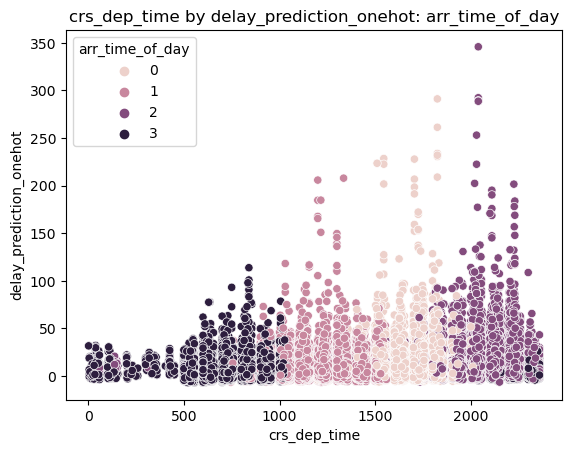

In [25]:
scatter_plot(final_test, xinput='crs_dep_time', yinput='delay_prediction_onehot', hinput='arr_time_of_day')

In [26]:
final_test.to_csv('../data/delay_predictions_M4_HChopra_BRose.csv')

In [27]:
final_df_import = pd.read_csv('../data/flights_test.csv')

In [28]:
final_df_import.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,orig_weather_categ,dest_weather_categ
0,2020-01-01,WN,WN,WN,5888,WN,N951WN,5888,13891,ONT,...,SFO,"San Francisco, CA",1810,1945,N,95,1,363,sunny,cloudy
1,2020-01-01,WN,WN,WN,6276,WN,N467WN,6276,13891,ONT,...,SFO,"San Francisco, CA",1150,1320,N,90,1,363,sunny,cloudy
2,2020-01-01,WN,WN,WN,4598,WN,N7885A,4598,13891,ONT,...,SJC,"San Jose, CA",2020,2130,N,70,1,333,sunny,cloudy
3,2020-01-01,WN,WN,WN,4761,WN,N551WN,4761,13891,ONT,...,SJC,"San Jose, CA",1340,1455,N,75,1,333,sunny,cloudy
4,2020-01-01,WN,WN,WN,5162,WN,N968WN,5162,13891,ONT,...,SJC,"San Jose, CA",915,1035,N,80,1,333,sunny,cloudy


In [32]:
final_df_export = final_df_import.loc[:, ['fl_date', 'mkt_carrier', 'mkt_carrier_fl_num', 'origin', 'dest']]

In [33]:
final_df_export.head()

,fl_date,mkt_carrier,mkt_carrier_fl_num,origin,dest
0,2020-01-01,WN,5888,ONT,SFO
1,2020-01-01,WN,6276,ONT,SFO
2,2020-01-01,WN,4598,ONT,SJC
3,2020-01-01,WN,4761,ONT,SJC
4,2020-01-01,WN,5162,ONT,SJC


In [34]:
final_df_export['predicted_delay'] = y_pred_df


In [35]:
final_df_export.head()

,fl_date,mkt_carrier,mkt_carrier_fl_num,origin,dest,predicted_delay
0,2020-01-01,WN,5888,ONT,SFO,5.081568
1,2020-01-01,WN,6276,ONT,SFO,2.558889
2,2020-01-01,WN,4598,ONT,SJC,3.380235
3,2020-01-01,WN,4761,ONT,SJC,2.422692
4,2020-01-01,WN,5162,ONT,SJC,-0.349177


In [37]:
final_df_export.to_csv('../data/HC_BR_Submission.csv')